# Sequence Tool utility 

The *sequence_tool_utils* module provides the classes *SequenceToolSummary* and *SequenceToolEnvironment* which can be used to import the sequence tool output files and analyse the data. In this notebook it is demonstrated how we can use the classes. We show the following

1. [SequenceToolSummary](#summary) How to read the sequence tool summary file and create a plot from it.
2. [SequenceToolEnvironment](#environment) How to read the sequence tool environment file and create a plot

First start with reading the modules we need in this notebook


In [2]:
import argparse
import logging
import os
import re
from collections import OrderedDict
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmc_utils.misc import (create_logger, read_settings_file, read_value_from_dict_if_valid)

from hmc_marine.sequence_tool_utils import (SequenceToolSummary, SequenceToolEnvironment)
from hmc_utils.numerical import ecdf2percentile

logger = create_logger(console_log_format_clean=True)
sns.set(context="notebook")

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<a id='summary'></a>

#### *SequecneToolSummary*: Importing and analysing the Sequence Tool Summary ".seq_out" file

In this section we show of to use the *SequenceToolSummary* class to import *.seq_out* files. First we need to set up the file names and perhaps modify the path if we need to go one level up.

In [1]:
file_names = ["data/SequenceTool/Sanha_Deep/pipelay3_10m5JLayCraneDownAndUp_30Damp_summary.seq_out",
              "data/SequenceTool/Sanha_Deep/pipelay3_10m5JLayCraneDownAndUp_22Damp_summary.seq_out"]
if not os.path.exists(file_names[0]):
    file_names = [os.path.join("..", file_name) for file_name in file_names]

NameError: name 'os' is not defined

Now we have set up the data files we are going to import the first file, analyse the contents and make some plots

In [3]:
logger.info("Reading file {}".format(file_names[0]))

seq = SequenceToolSummary(file_names[0])
seq.report()

Reading file ..\data/SequenceTool/Sanha_Deep/pipelay3_10m5JLayCraneDownAndUp_30Damp_summary.seq_out

----------------------------------------------------------
Total Operation Time
----------------------------------------------------------
01.Jan - 31.Jan    : 3888.0 hrs (162.0 days)
01.Feb - 29.Feb    : 4289.0 hrs (178.7 days)
01.Mar - 31.Mar    : 4718.0 hrs (196.6 days)
01.Apr - 30.Apr    : 5006.0 hrs (208.6 days)
01.May - 31.May    : 4961.0 hrs (206.7 days)
01.Jun - 30.Jun    : 4694.0 hrs (195.6 days)
01.Jul - 31.Jul    : 4305.0 hrs (179.4 days)
01.Aug - 31.Aug    : 3930.0 hrs (163.8 days)
01.Sep - 30.Sep    : 3615.0 hrs (150.6 days)
01.Oct - 31.Oct    : 3468.0 hrs (144.5 days)
01.Nov - 30.Nov    : 3385.0 hrs (141.0 days)
01.Dec - 31.Dec    : 3492.0 hrs (145.5 days)
----------------------------------------------------------
01.Jan - 31.Dec    : 4148.0 hrs (172.8 days)
----------------------------------------------------------
Nett span          : 2925.0 hrs (121.9 days)
------------

All the information available in the set_out summary file is now available via the seq object. The Waiting on Waiter is stored in the wow_time object, which again carries the field *per_month*, *per_month_in_days*, *per_year*. We can have a look at the attributes and value by just printing the fields:

In [4]:
logger.info(seq.wow_time)

per_year             : 1223.0 
nett_days            : 0 
probability          : [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]  (first 20 items)
per_month_in_days    : [40.1, 56.8, 74.7, 86.7, 84.8, 73.7, 57.5, 41.9, 28.8, 22.6, 19.2, 23.6] 
per_year_sequence    : [3.0, 2.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0, 480.0, 16.0, 0.0, 0.0, 75.0, 17.0, 280.0, 19.0, 0.0, 1.0, 0.0]  (first 20 items)
per_year_in_days     : 51.0 
nett_days_sequence   : 0 
per_month_sequence   : 0.0  (first item from double list)
per_month            : [963.0, 1364.0, 1793.0, 2081.0, 2036.0, 1769.0, 1380.0, 1005.0, 690.0, 543.0, 460.0, 567.0] 



In [5]:
logger.info(seq.workability)

per_year             : 71.0 
nett_days            : 0 
probability          : [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]  (first 20 items)
per_month_in_days    : [3.1, 2.8, 2.6, 2.4, 2.5, 2.6, 2.8, 3.1, 3.4, 3.5, 3.6, 3.5] 
per_year_sequence    : [78.0, 88.0, 91.0, 100.0, 87.0, 90.0, 90.0, 87.0, 90.0, 39.0, 27.0, 99.0, 96.0, 56.0, 37.0, 43.0, 24.0, 100.0, 97.0, 98.0]  (first 20 items)
per_year_in_days     : 3.0 
nett_days_sequence   : 0 
per_month_sequence   : 98.0  (first item from double list)
per_month            : [75.0, 68.0, 62.0, 58.0, 59.0, 62.0, 68.0, 74.0, 81.0, 84.0, 86.0, 84.0] 



In [6]:
logger.info(seq.cumulative_wow_probability)

per_year             : 321.0  (first item from double list)
p90_per_year         : 103.2 
per_month_in_days    : 12.4  (first item from double list)
per_year_in_days     : 13.4  (first item from double list)
probability          : [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0] 
p90_per_month        : [77.5, 105.3, 144.5, 142.4, 129.6, 112.3, 86.4, 64.3, 45.0, 35.0, 29.2, 34.4] 
per_month            : 297.0  (first item from double list)



The SequencyToolSummary object *seq* also has a simple plotting utility to plot the WoW over the year

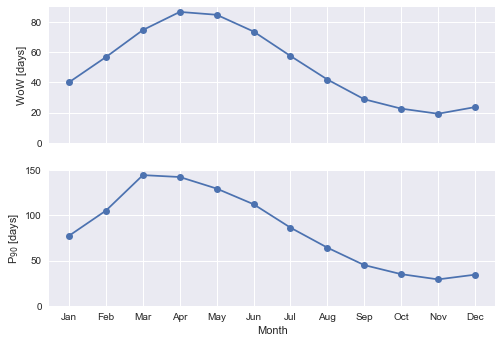

In [7]:
seq.plot_wow()
plt.show()

In case you want to combine multiple files into one plot you can accumulate the plots. The limits of the maximum wow value (top plot) and p90 value can be passed

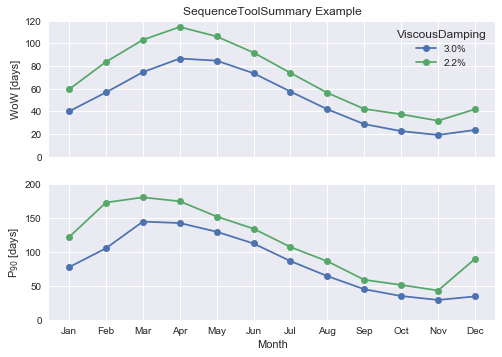

In [8]:
fig = axis = None
for i, file_name in enumerate(file_names):
    seq = SequenceToolSummary(file_name)
    # use a regular expression to get the viscosity from the file name: \d matches any number 0~9, the brackets select
    # the part we want to return (i.e. to the digits in between '_' and 'Damp'). 
    # The result of the first match (in between the brackets) is stored in group(1)
    viscosity = float(re.search("_(\d+)Damp", file_name).group(1))/10.0
    # plot the current file to fig and axis. Return fig and axis so that we can pass it the second round to build on the
    # first plot. Add a line name using the viscosity we got from the file name
    fig, axis = seq.plot_wow(fig, axis, plot_title="SequenceToolSummary Example", 
                             line_title="{}%".format(viscosity), legend_title="ViscousDamping", 
                             wow_max=120, p90_max=200)
plt.show()
    

<a id='environment'></a>

#### *SequenceToolEnvironment*: How to read a Environment File

Next we are going to import a sequence tool environment file and do some analyses. First set up the file name 

In [9]:
file_name ="data\SequenceTool\Sanha_Shallow\pipelay3_10m5JLayCraneDownAndUp_30Damp.env_mat"
if not os.path.exists(file_name):
    file_name = os.path.join("..", file_name)
logger.info("Importing environment file {}".format(file_name))

Importing environment file ..\data\SequenceTool\Sanha_Shallow\pipelay3_10m5JLayCraneDownAndUp_30Damp.env_mat


Now import the environment file. The time series are stored in the 'data' field of the create object *env*. This data field is an ordinary Pandas data frame, so we can use anything which we expect from DataFrames

In [10]:
env = SequenceToolEnvironment(file_name)
env.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56583 entries, 1992-01-01 00:00:00 to 2011-05-13 18:00:00
Data columns (total 45 columns):
Time                                  56583 non-null float64
Vw                                    56583 non-null float32
Vwdir                                 56583 non-null float32
specHsTp2                             56583 non-null float32
HsTp2_total                           56583 non-null float32
Hs_total                              56583 non-null float32
Tp_total                              56583 non-null float32
Tz_total                              56583 non-null float32
Tm_total                              56583 non-null float32
Hsdir_total                           56583 non-null float32
HsTp2_wind                            56583 non-null float32
Hs_wind                               56583 non-null float32
Tp_wind                               56583 non-null float32
Tz_wind                               56583 non-null float32
Tm

The information fields which did not fit the DataFrame is stored in a dictionary attribute field called 'info' which we can show as well

In [11]:
for key, value in env.info.items():
    logger.info("{:20s} : {}".format(key, value))

Point_Aegir10m5_CoG_Motion_RZ2 : [1]
Point_Aegir10m5_CoG_Motion_RX : [1]
Point_Aegir10m5_CoG_Motion_Z : [1]
Point_Aegir10m5_CoG_Motion_Y : [1]
Point_Aegir10m5_CoG_Motion_RY2 : [1]
Point_Aegir10m5_CoG_Motion_Z2 : [1]
Point_Aegir10m5_CoG_Motion_RY : [1]
Point_Aegir10m5_CoG_Motion_RX2 : [1]
Point_Aegir10m5_CoG_Motion_RZ : [1]
Point_Aegir10m5_CoG_Motion_X2 : [1]
Point_Aegir10m5_CoG_Motion_X : [1]
Point_Aegir10m5_CoG_Motion_Y2 : [1]


The fields with the labels RX_315 and RX2_315 correspond to the roll motion  for heading 315 for repectively crane Down and Up, respectively. Let's plot both values + the Hs_total for a referenece

Adding line  0 - Hs         : Hs_total
Adding line  1 - Down       : Point_Aegir10m5_CoG_Motion_RX_315
Adding line  2 - Up         : Point_Aegir10m5_CoG_Motion_RX2_315


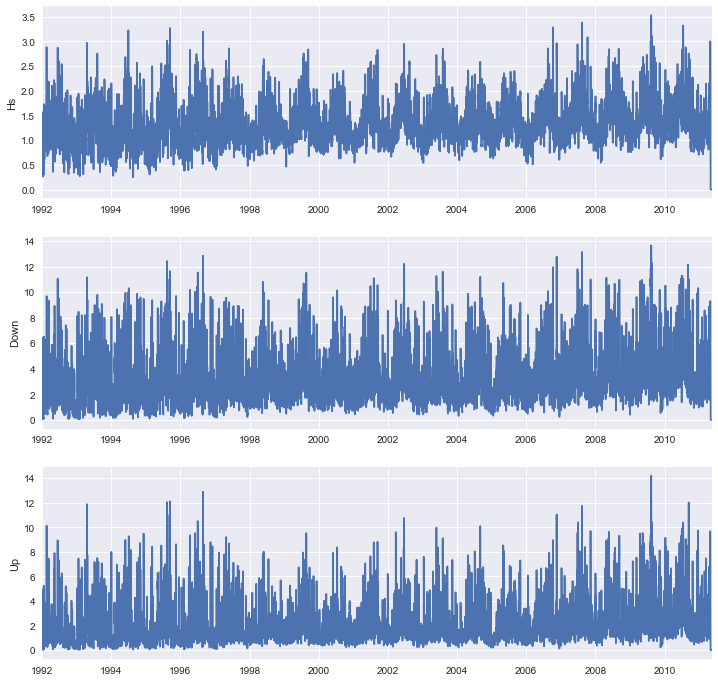

In [12]:
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(12,12))
label = "Point_Aegir10m5_CoG_Motion"
angle = "315"
# build a dictionary we we connect each key (Hs/Up/Down) to a field name. The field name is build using the join method
# which combines a list of strings with the character before join (ie. "_")
# Als we use an OrderedDict in stead of a dict as 'dict' does not keep the order of the items, OrderedDict does
channels = OrderedDict()
channels["Hs"] = "Hs_total"
channels["Down"] = "_".join([label, "RX", angle]) 
channels["Up"] = "_".join([label, "RX2", angle]) 

# Using the dict we just created, loop over the items and add each channel to its own plot. The enumerate creates a
# counter which is stored to i_ax. We can use that to refer to the correct axis. The columns is selected from the
# dataframe env.data by using the channel_name we just stored in the dictionary. The key name of each dictionary field
# is used to give the lines a name
for i_ax, (key, channel_name) in enumerate(channels.items()):
    logger.info("Adding line {:2d} - {:10s} : {}".format(i_ax, key, channel_name))
    env.data[channel_name].plot(ax=axis[i_ax], label=key)
    axis[i_ax].set_ylabel(key)
plt.show()

As a next step we are going to make a plot of the cumulative distribution function (CDF) of the RX motion for both the crane up and crane down. To calculate the CDF from a time series we use the statsmodels module

Calculating CDF of line  1 - Down       : Point_Aegir10m5_CoG_Motion_RX_315
Crane Down : P10=1.1 P50=2.8 P90=6.5
Calculating CDF of line  2 - Up         : Point_Aegir10m5_CoG_Motion_RX2_315
Crane Up : P10=0.6 P50=1.5 P90=4.3


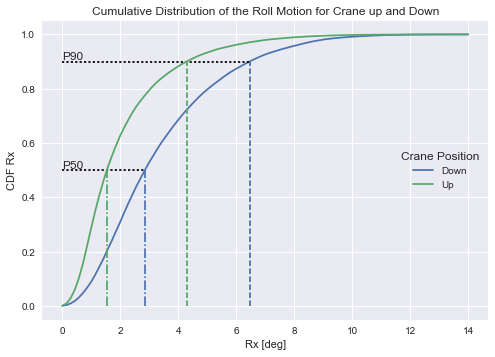

In [13]:
fig, axis = plt.subplots(nrows=1, ncols=1)
rx_max  = 14 # maximum roll
rx_bin = np.linspace(0, rx_max, num=100) # create an array with rx values

for i_ax, (key, channel_name) in enumerate(channels.items()):
    if key == "Hs":
        # skip the channel with the Hs
        continue
        
    logger.info("Calculating CDF of line {:2d} - {:10s} : {}".format(i_ax, key, channel_name))
    
    # calculate the CDF
    ecdf = sm.distributions.ECDF(env.data[channel_name].values)
    
    # get the statitics
    p10 = ecdf2percentile(ecdf, 0.1)
    p50 = ecdf2percentile(ecdf, 0.5)
    p90 = ecdf2percentile(ecdf, 0.9)
    
    logger.info("Crane {} : P10={:.1f} P50={:.1f} P90={:.1f}".format(key, p10, p50, p90))
    
    # plot the CDF. Note that since we now only have 1 row and 1 column, the 'axis' is not a list anymore
    line, = axis.plot(rx_bin, ecdf(rx_bin), label=key)
    
    color = line.get_color()
    
    # draw some lines and annotations
    axis.plot([p50, p50], [0, 0.5], '-.', color=color)
    axis.plot([p90, p90], [0, 0.9], '--', color=color)
    if i_ax == 1:
        axis.plot([0, p50], [0.5, 0.5], ':', color="k")
        axis.plot([0, p90], [0.9, 0.9], ':', color="k")
        axis.text(0., 0.5, "P50", horizontalalignment="left", va="bottom")
        axis.text(0., 0.9, "P90", horizontalalignment="left", va="bottom")

axis.set_xlabel("Rx [deg]")
axis.set_ylabel("CDF Rx")
plt.legend(loc="right", title="Crane Position")
plt.title("Cumulative Distribution of the Roll Motion for Crane up and Down")
    
plt.show()

From this plot it is clear the putting the Crane up reduces the amount of roll motion: The P90 for the Crane up is 4.3 degrees, whereas the P90 for the creane down is 6.5 degrees.